# 2020 Cyberinfrastructure for Intelligent Water Supply (CIWS) Data Visualization Challenge

### Datasets
* ClassifiedEvents
* RawData 

 #### Import Libraries 

In [1]:
# These libraries are already installed on the Hydroshare Server
import pandas as pd # Data manipulation and analysis library
import matplotlib.pyplot as plt # Comprehensive library for creating static, animated, and interactive visualizations
import datetime # Library that supplies classes for manipulating dates and times
import seaborn as sns # Data visualization library based on matplotlib

# Seaborn configuration: Plot size, grid type, and lines width
sns.set()
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2})

#### Import Data

In [2]:
# Read csv data file as a dataframe using pandas
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
Events = pd.read_csv('Classified_Events.csv')
RawData = pd.read_csv('Raw_Data.csv', index_col ='Time',parse_dates = ['Time'], date_parser=dateparse, skiprows = 3)
RawData = RawData.drop(columns=['Record'])
# the output of this step are tables of raw data and classified events

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
# Inspect the first 5 rows of classifed events table
Events.head()

,StartTime,EndTime,Duration(min),Volume(gal),Flowrate(gpm),Peak_Value(gpm),Mode_Value(gpm),Label
0,2020-07-21 09:44:00,2020-07-21 09:45:00,0.466667,0.915618,1.962039,0.166476,0.083238,faucet
1,2020-07-21 09:45:00,2020-07-21 09:46:00,0.266667,0.457809,1.716784,0.124857,0.083238,faucet
2,2020-07-21 10:04:00,2020-07-21 10:05:00,0.733333,0.541047,0.737791,0.041619,0.041619,faucet
3,2020-07-21 10:05:00,2020-07-21 10:07:00,1.200000,3.495996,2.913330,0.208095,0.166476,toilet
4,2020-07-21 10:08:00,2020-07-21 10:08:00,0.333333,0.332952,0.998856,0.041619,0.041619,faucet


In [4]:
# Inspect the first 5 rows of raw data table
RawData.head()

,Pulses
Time,
2020-07-21 09:42:07,0.0
2020-07-21 09:42:11,0.0
2020-07-21 09:42:15,0.0
2020-07-21 09:42:19,0.0
2020-07-21 09:42:23,0.0


#### Water use variation per each end use type
 + Using boxplots function with Seaborn and Matplotlib
 + Create horizontal subplots, one for each water use feature (Volume, Duration, and Flowrate)
 + Plot on each subplot axis

[Text(0.5, 0, '')]

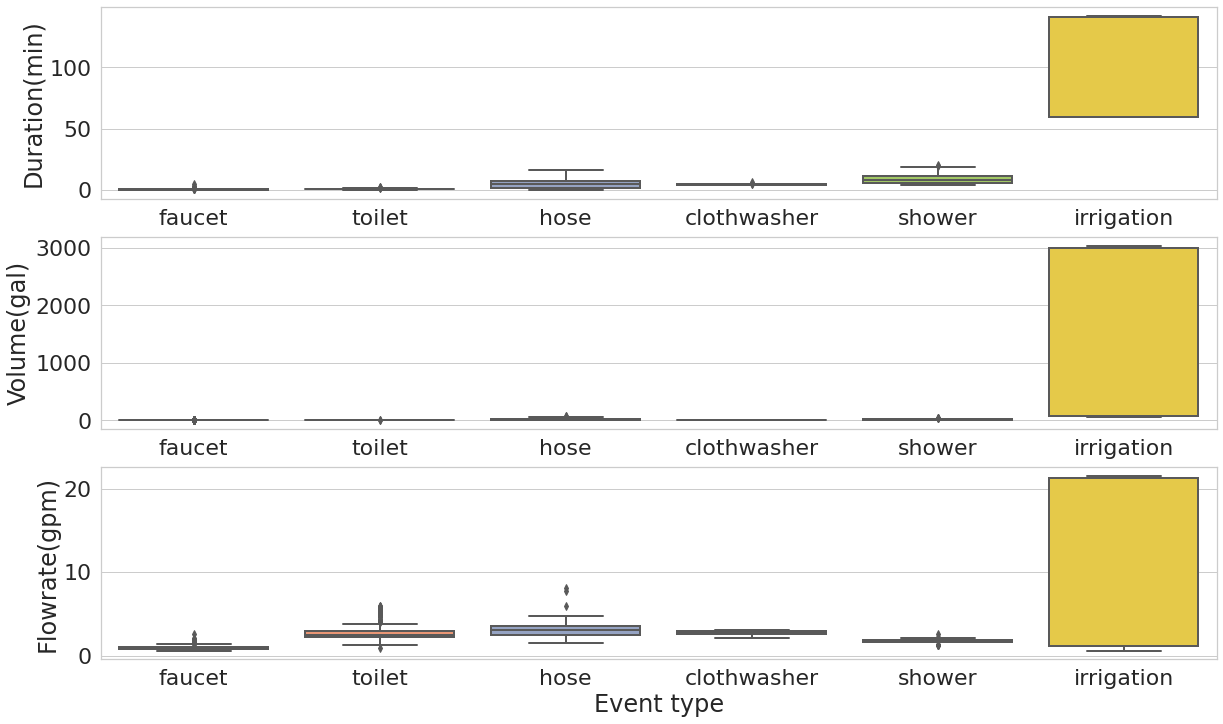

In [5]:
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(20,12))
sns.boxplot(ax=axes[0], x="Label", y="Duration(min)", data=Events, palette="Set2")
sns.boxplot(ax=axes[1], x="Label", y="Volume(gal)", data=Events, palette="Set2")
sns.boxplot(ax=axes[2], x="Label", y="Flowrate(gpm)", data=Events, palette="Set2")
axes[2].set(xlabel='Event type')
axes[1].set(xlabel='')
axes[0].set(xlabel='')
# The output of this step is a box and whisker plot that shows the variation in each water end use type compared to
# other water end use types. 

In [6]:
# Same plots above considering indoor water use only
# Exclude outdoor water use events from the table
IndoorEvents = Events[Events.Label != "irrigation"]
IndoorEvents = IndoorEvents[IndoorEvents.Label != "hose"]

Text(0.5, 1.0, 'Indoor Water Use')

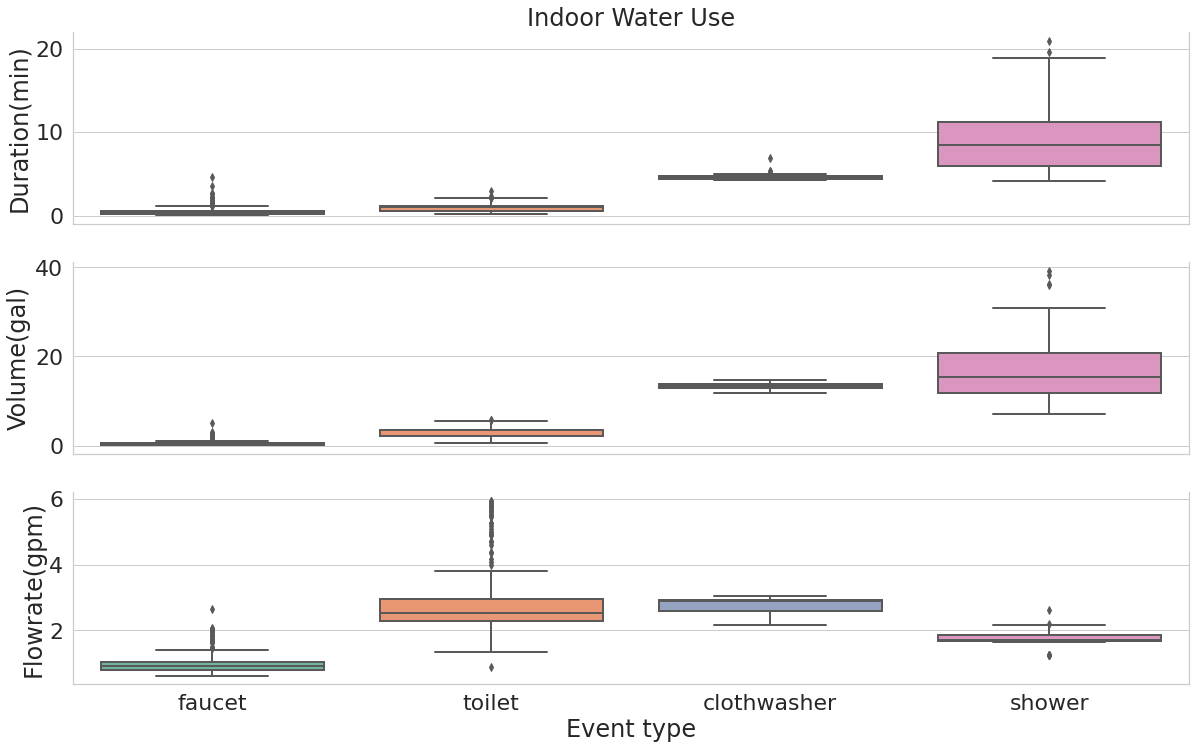

In [7]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,12))
sns.boxplot(ax=axes[0], x="Label", y="Duration(min)", data=IndoorEvents, palette="Set2")
sns.boxplot(ax=axes[1], x="Label", y="Volume(gal)", data=IndoorEvents, palette="Set2")
sns.boxplot(ax=axes[2], x="Label", y="Flowrate(gpm)", data=IndoorEvents, palette="Set2")
sns.despine(right=False)
axes[2].set(xlabel='Event type')
axes[1].set(xlabel='')
axes[0].set(xlabel='')
axes[0].set_title('Indoor Water Use')

#### Shower events duration compared to RWEUS2016 Study
+ Residential Water End Use Study (RWEUS2016) URL: https://www.circleofblue.org/wp-content/uploads/2016/04/WRF_REU2016.pdf
+ Using Violinplot with Seaborn and Matplotlib
+ Violin plot is a combination of bar and kernel density plots
+ The width of the violin represent the probability where skinner sections represent a lower probability
+ Add a horizontal line that represent the average shower duration from the REWUS2016 study

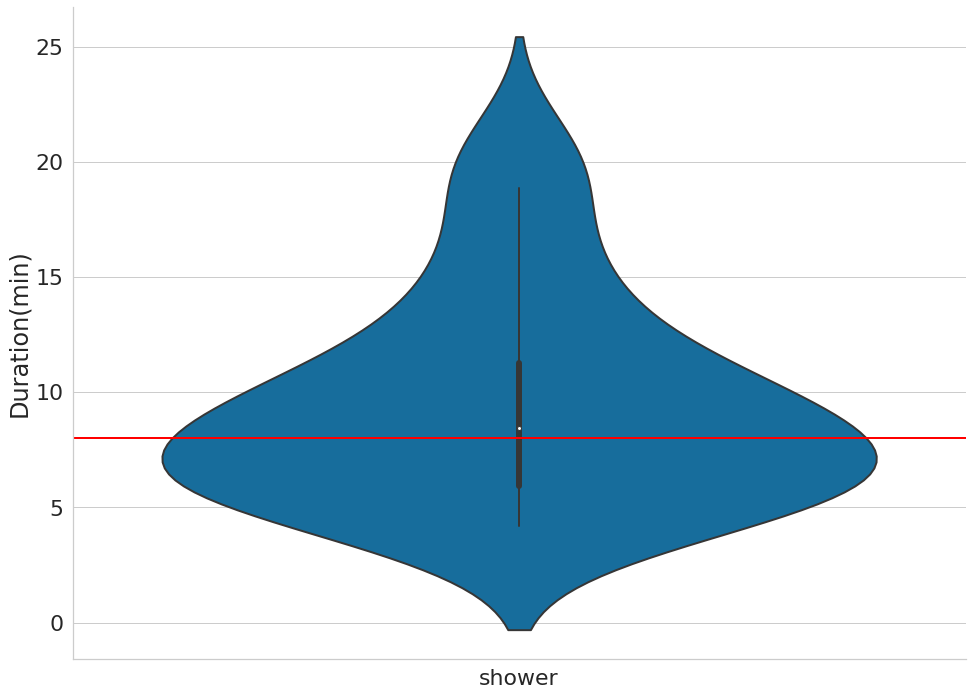

In [8]:
ShowerEvents = Events[Events.Label == "shower"]
ax = sns.violinplot(x="Label", y="Duration(min)", data=ShowerEvents, palette="colorblind")
sns.despine(right=True)
ax.set(xlabel='', ylabel='Duration(min)')
ax.axhline(y = 8, c = 'red')

#### Daily and hourly water use

In [9]:
# Aggregate pulses by hour and calculate the average number of pulses per each hour
Use_Hour = RawData.groupby(RawData.index.hour).mean()
Use_Hour.Pulses = Use_Hour.Pulses * 0.041619 * 15 * 60 # where 0.041619 is the meter resoultion, 15 is the number of 4 seconds in one minute (60/4)
# and 60 is the number of minutes in an hour 

[Text(0.5, 0, 'Hour of the day'), Text(0, 0.5, 'Water use (gal)')]

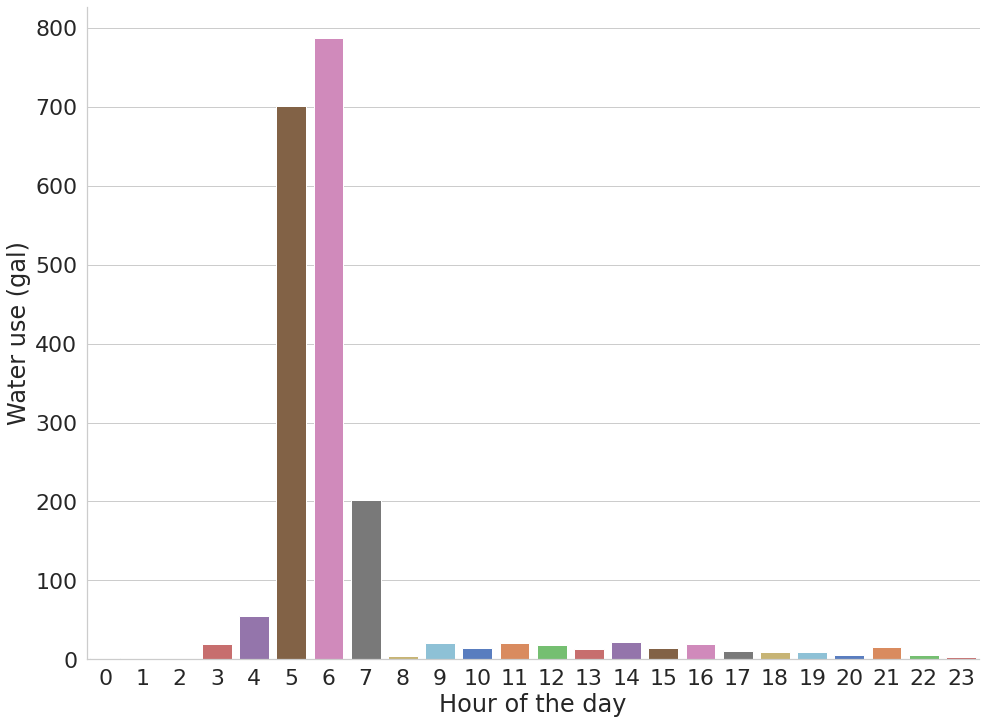

In [10]:
ax = sns.barplot(x= Use_Hour.index, y="Pulses", data=Use_Hour, palette="muted")
sns.despine(right=True)
ax.set(xlabel='Hour of the day', ylabel='Water use (gal)')
# The output of this step is the average water use per hour

##### Excluding irrigation hours (from 3 to 7 AM) 

In [11]:
Use_Hour.drop([3,4,5,6,7], inplace = True) 

[Text(0.5, 0, 'Hour of the day'), Text(0, 0.5, 'Water use (gal)')]

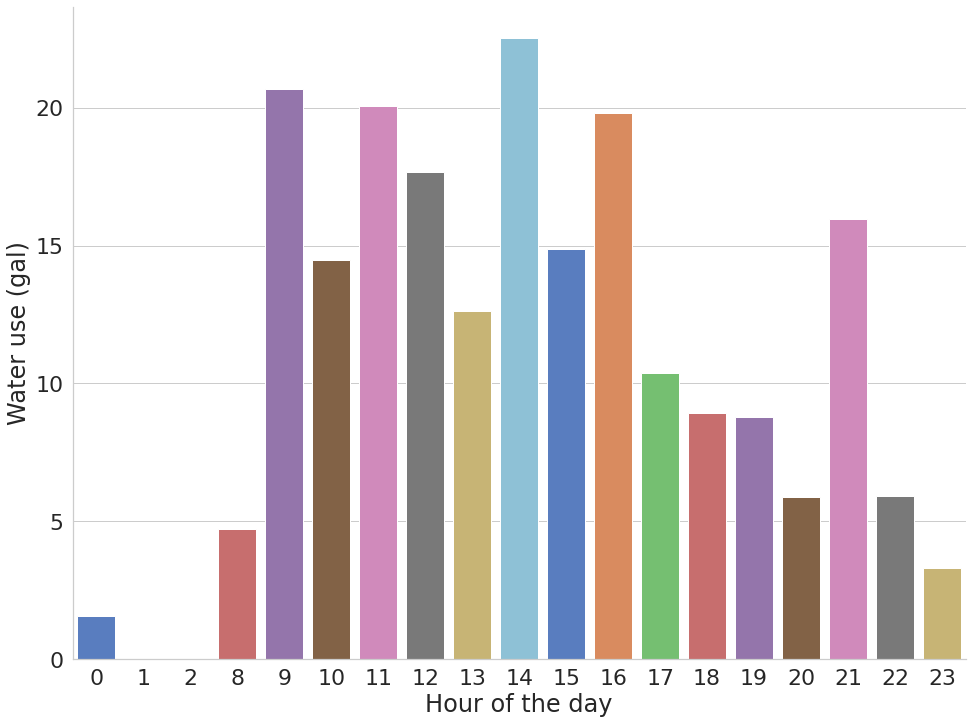

In [12]:
ax = sns.barplot(x= Use_Hour.index, y="Pulses", data=Use_Hour, palette="muted")
sns.despine(right=True)
ax.set(xlabel='Hour of the day', ylabel='Water use (gal)')
# The output of this step is the average water use per hour for indoor water use

In [13]:
# Aggregate pulses by day and calculate the average number of pulses in each day
Use_Day = RawData.groupby(RawData.index.day_name()).mean()
Use_Day.Pulses = Use_Day.Pulses * 0.041619 * 15 * 60 * 24 # 0.041619 is the meter resoultion, 15 is the number of 4 seconds in one minute (60/4)
# 60 is the number of minutes in an hour, and 24 is the number of hours in a day 

In [14]:
# Create an array with days of the week names and map it to the daily water use table (We did that so we can sort the days from Monday to Sunday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = Use_Day.index.map(mapping)
Use_Day = Use_Day.iloc[key.argsort()]

[Text(0.5, 0, 'Day of the week'), Text(0, 0.5, 'Water use (gal)')]

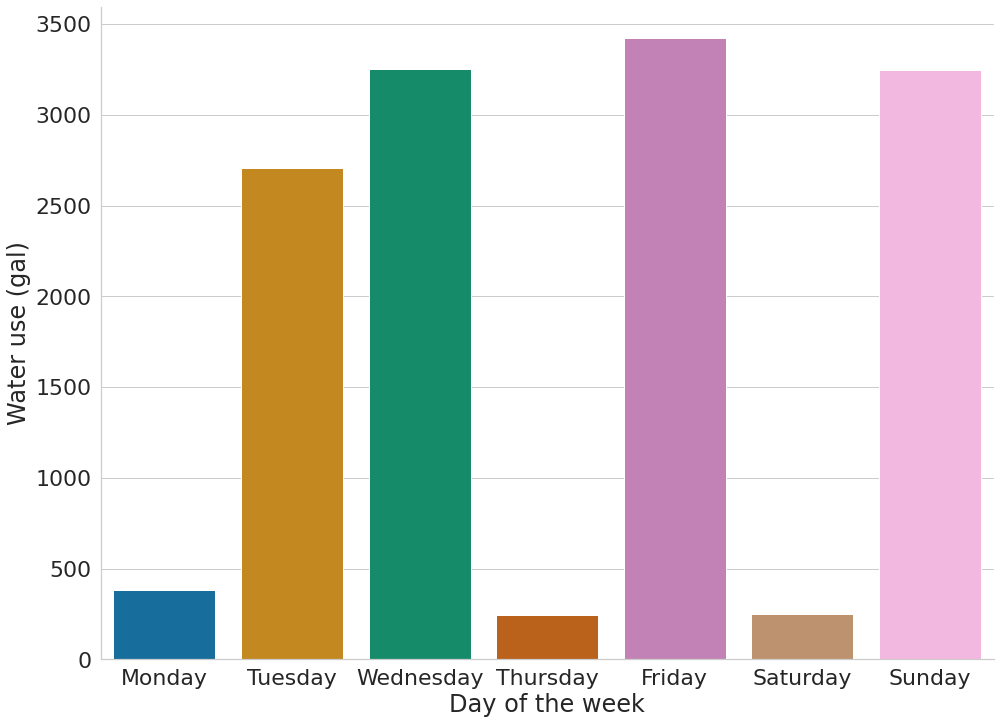

In [15]:
ax = sns.barplot(x= Use_Day.index, y="Pulses", data=Use_Day, palette="colorblind")
sns.despine(right=True)
ax.set(xlabel='Day of the week', ylabel='Water use (gal)')
# The output of this step is the average water use per day

#### By Nour Atallah